AMAZON SENTIMENT ANALYSIS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('tableau-colorblind10')
import nltk


In [2]:
# Reading csv file
df = pd.read_csv(r'/Users/raghul/Downloads/archive (10)/Musical_instruments_reviews.csv')

1. Exploring the data set

In [3]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [5]:
# Amazon review distribution
df['overall'].describe()

count    10261.000000
mean         4.488744
std          0.894642
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

In [6]:
df['overall'].value_counts()

overall
5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='Count'>

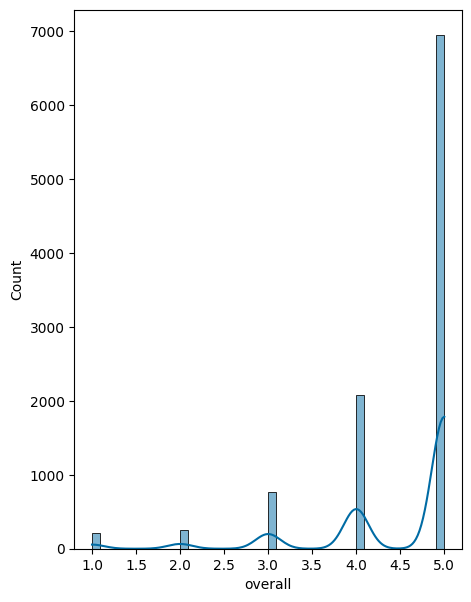

In [7]:
plt.figure(figsize=[5,7])
sns.histplot(df['overall'],kde=True)

In [8]:
# dropping unwanted columns
df2 =df.drop(['unixReviewTime','reviewTime','helpful'],axis=1)
df2

,reviewerID,asin,reviewerName,reviewText,overall,summary
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",5.0,good
1,A14VAT5EAX3D9S,1384719342,Jake,The product does exactly as it should and is q...,5.0,Jake
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",The primary job of this device is to block the...,5.0,It Does The Job Well
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.
...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"Great, just as expected. Thank to all.",5.0,Five Stars
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom..."
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,I have tried coated strings in the past ( incl...,4.0,Good for coated.
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made


2. VADER SENTIMENT ANALYSIS APPROACH

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer 
from tqdm.notebook import tqdm
sia =SentimentIntensityAnalyzer()

In [10]:
# example
sia.polarity_scores('i am sad')

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [11]:
result = {}
for i,row in tqdm(df2.iterrows(), total=len(df2)):
    text = str(row['reviewText'])
    ID = row['reviewerID']
    result[ID] = sia.polarity_scores(text)

  0%|          | 0/10261 [00:00<?, ?it/s]

In [12]:
vader_result = pd.DataFrame(result).T


In [13]:
# merging with data frame
vader_result = vader_result.rename_axis('reviewerID').reset_index()
vader_result = vader_result.merge(df2, how = 'left')

In [14]:
vader_result

,reviewerID,neg,neu,pos,compound,asin,reviewerName,reviewText,overall,summary
0,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",5.0,good
1,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002F7K7Y,"cassandra tu ""Yeah, well, that's just like, u...",I've been trying out different gauges to exper...,5.0,Get these
2,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002GZM00,"cassandra tu ""Yeah, well, that's just like, u...",I've got 5 effects hooked up to this thing. It...,5.0,5 Hooked up
3,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002IAJ56,"cassandra tu ""Yeah, well, that's just like, u...",Defiantly a space saver. I can put all of my e...,5.0,Space saver
4,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002PBS6S,"cassandra tu ""Yeah, well, that's just like, u...",This is my first time using a hybrid mix and t...,5.0,Good Mix
...,...,...,...,...,...,...,...,...,...,...
10256,A3A7Y3TSPPZU9T,0.000,0.655,0.345,0.9022,B008BPI2HE,caffeinebrain,Knowing nothing about guitars except that my h...,5.0,A+ From My Husband
10257,A3A7Y3TSPPZU9T,0.000,0.655,0.345,0.9022,B00AQBT3EW,caffeinebrain,I'm certainly not the musician in the family a...,5.0,High Quality Guitar Strings
10258,A3A7Y3TSPPZU9T,0.000,0.655,0.345,0.9022,B00IZCSW3M,coffeebrain,I ordered these for my husband the guitar play...,5.0,"Guitar Strings, Light"
10259,A3A7Y3TSPPZU9T,0.000,0.655,0.345,0.9022,B00J4TBMVO,coffeebrain,"I ordered this for my husband, the musician. H...",5.0,Great Strings


<Figure size 1000x600 with 0 Axes>

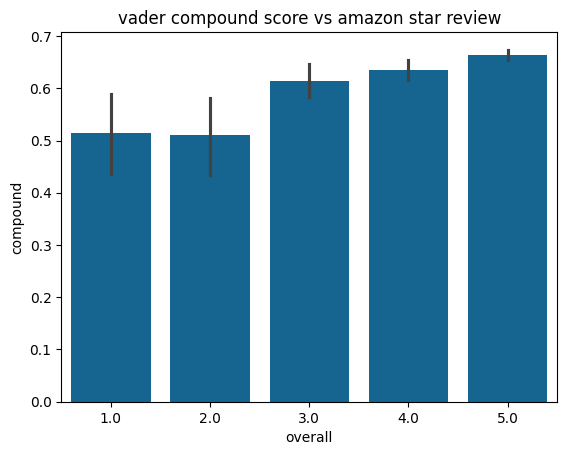

<Figure size 1000x600 with 0 Axes>

In [15]:
sns.barplot(data=vader_result,x = 'overall',y='compound')
plt.title('vader compound score vs amazon star review')
plt.figure(figsize=(10, 6))


Text(0.5, 1.0, 'Negative Score vs Amazon Star Review')

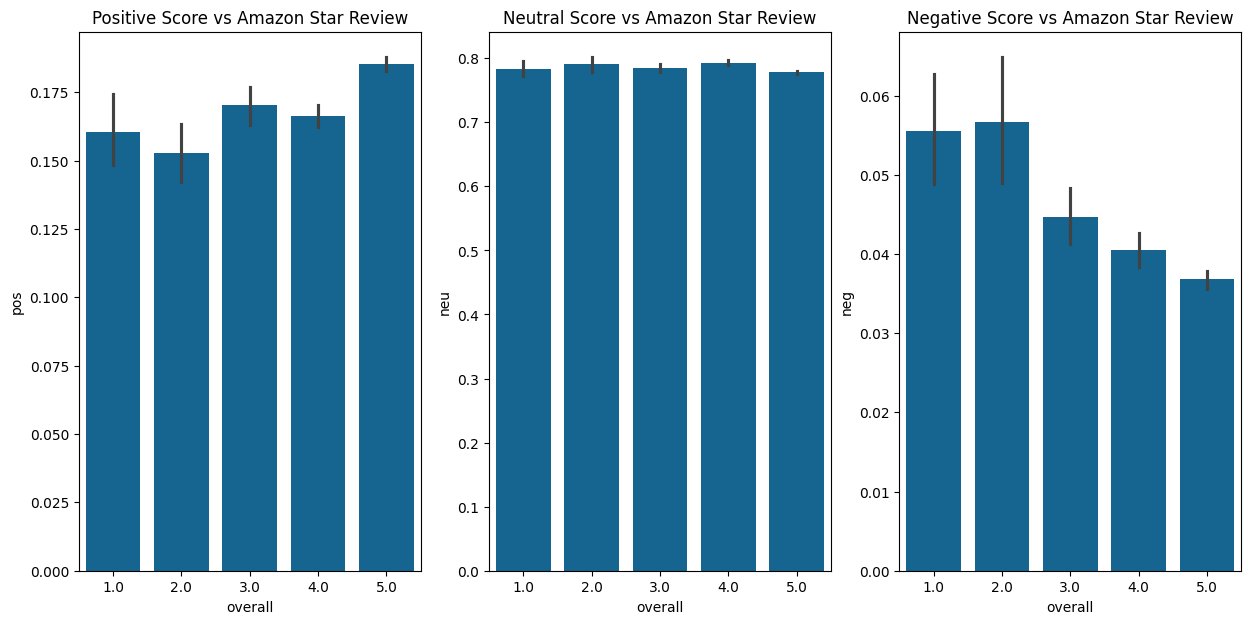

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))


sns.barplot(data=vader_result, x='overall', y='pos', ax=axs[0])
sns.barplot(data=vader_result, x='overall', y='neu', ax=axs[1])
sns.barplot(data=vader_result, x='overall', y='neg', ax=axs[2])

axs[0].set_title('Positive Score vs Amazon Star Review')
axs[1].set_title('Neutral Score vs Amazon Star Review')
axs[2].set_title('Negative Score vs Amazon Star Review')

3. HUGGING FACE - BERT SENTIMENT ANALYSIS APPROACH

In [ ]:

!pip3 install torch torchvision torchaudio

In [18]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
import torch


/Users/raghul/Desktop/pandas_project/raaghul/lib/python3.12/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [19]:
# model initialization
token = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/Users/raghul/Desktop/pandas_project/raaghul/lib/python3.12/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [20]:
# example
tokens= token.encode('i am sad',return_tensors='pt')
results = model(tokens)
int(torch.argmax(results.logits))+1

1

In [21]:
# applying bert model on dataset
def bert_score(review):
    tokens =token.encode(review,return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits)) + 1

In [22]:
op = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = str(row['reviewText'])
        ID = row['reviewerID']
        op[ID] = bert_score(text)
    except RuntimeError:
        print(f'broke for {ID}')
    
    

  
print (op)  
    

  0%|          | 0/10261 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (871 > 512). Running this sequence through the model will result in indexing errors


broke for A2MR43RDPZX3J
broke for A2KI91IR3RA7D0
broke for A2KI91IR3RA7D0
broke for A6FIAB28IS79
broke for A203OCQQ12MAVT
broke for A20L3BCRCICRSQ
broke for A15TYOEWBQYF0X
broke for A2MMH4O7EDNLCV
broke for A2RIQKV4OOXME1
broke for A3MRBUCGH66JTY
broke for A2ZGEV4CTSCTIZ
broke for A23AKO4BZLZ8DE
broke for ADH0O8UVJOT10
broke for A22Z554ZQ8NFPC
broke for A27L5L6I7OSV5B
broke for ADH0O8UVJOT10
broke for AH2F47XZ5L8NR
broke for A1EX4410F46C8O
broke for A3FW4THIMBIN6V
broke for A3BMI7VGJT60Y7
broke for A8ANJNZAZQ6IQ
broke for A15TYOEWBQYF0X
broke for A356RFKNIG043B
broke for ALHC64J88LVWO
broke for A2Z89YMZZJWBHS
broke for A356RFKNIG043B
broke for AXG9N4QFS4QYP
broke for A3JUQ2E799OC5B
broke for ACWH4WJMC5UFN
broke for A3EXWV8FNSSFL6
broke for A3AOPVQ7EZHTWA
broke for A2XXBZPQT5EXHV
broke for A2KI91IR3RA7D0
broke for A1QDSJZQWJZOL1
broke for A3GH47E9FF8WN1
broke for A1XNCV67JBJVF7
broke for A1SCWHXAB2ZK7N
broke for A3GH47E9FF8WN1
broke for A2VH0UT5EQFB6P
broke for AKYDGCKCY7H9F
broke for A

In [23]:
print (op) 

{'A2IBPI20UZIR0U': 4, 'A14VAT5EAX3D9S': 5, 'A195EZSQDW3E21': 4, 'A2C00NNG1ZQQG2': 5, 'A94QU4C90B1AX': 5, 'A2A039TZMZHH9Y': 5, 'A1UPZM995ZAH90': 4, 'AJNFQI3YR6XJ5': 2, 'A3M1PLEYNDEYO8': 4, 'AMNTZU1YQN1TH': 5, 'A2NYK9KWFMJV4Y': 4, 'A35QFQI0M46LWO': 5, 'A2NIT6BKW11XJQ': 5, 'A1C0O09LOLVI39': 4, 'A17SLR18TUMULM': 5, 'A2PD27UKAD3Q00': 5, 'AKSFZ4G1AXYFC': 3, 'A67OJZLHBBUQ9': 5, 'A2EZWZ8MBEDOLN': 5, 'A1CL807EOUPVP1': 4, 'A1GMWTGXW682GB': 4, 'A2G12DY50U700V': 5, 'A3E0CF25A7LD2': 4, 'A2W3CLAYZLDPTV': 5, 'A398X9POBHK69N': 5, 'AXWB93VKVML6K': 4, 'A2FZ4Z0UFA1OR8': 4, 'AXP9CF1UTFRSU': 4, 'A2CCGGDGZ694CT': 5, 'A27DR1VO079F1V': 3, 'A1LQC225SE8UNI': 5, 'AU9BPT3Y3K6J4': 5, 'A14Z9LAETO21KL': 4, 'A2074KEJGRYJV4': 4, 'A7TRK2GG6BHWD': 5, 'A319B090A2POEB': 3, 'A396ELNTQDFYPO': 2, 'A17CU1D2CWXOHB': 5, 'A1S0HTDO0P4N5V': 1, 'A3DWQW2L39RB1S': 1, 'AQQ91U1U4YKDF': 5, 'AA5TINW2RJ195': 5, 'ABC68JUCPTVOE': 4, 'A3W2E6S24BTXXK': 5, 'A3872Y2XH0YDX1': 5, 'A13A81NN0NRD1S': 5, 'A1EUO0BU72JR7T': 4, 'A1H4WSC8JWS59N': 5, 'A3O

In [24]:
BERT_SCORE = pd.DataFrame(list(op.items()), columns=['reviewerID', 'BERT_score'])

BERT_SCORE

,reviewerID,BERT_score
0,A2IBPI20UZIR0U,4
1,A14VAT5EAX3D9S,5
2,A195EZSQDW3E21,4
3,A2C00NNG1ZQQG2,5
4,A94QU4C90B1AX,5
...,...,...
1422,A27EWIL4YBWTA0,4
1423,A3EYCAYIIBDXUF,4
1424,A3HH71P93ZWAMB,5
1425,A3A7Y3TSPPZU9T,5


In [25]:
# merging with dataframe
BERT_SCORE = BERT_SCORE.merge(df2, how = 'left')
BERT_SCORE.sample(20)

,reviewerID,BERT_score,asin,reviewerName,reviewText,overall,summary
10231,A3EYCAYIIBDXUF,4,B007T8CUNG,"C. Ruud ""cruud""","Fantastic pedal, especially considering the pr...",5.0,"Great pedal, great price."
1740,AJK15Q9JOEHRH,5,B00AZUAORE,aceofbase,"Small footprint, simple to use, one button, on...",5.0,Great little looper
8857,A2XSWF2AJSXQZB,5,B000978D58,bassestkkm,This stand surprised my. It is lightweight but...,5.0,Great value for the money but not perfect.
7909,A3IDC5FP52KJWJ,5,B005ZV5K0O,Highmember,a ver nice and powerfull product for the mans ...,5.0,very nice and cool
2664,A3BTH66WVCQAM9,4,B001AH83UG,chris,I bought this for my hercules fold up stand an...,5.0,A wonderful light for the music stand
4138,A1EVEQAR05SY7L,5,B003VWJ2K8,W. Perry,"A great little tuner. Very accurate, easy to u...",5.0,Buy them by the dozen!
5408,A35NAFXV5GHZ92,5,B007K3EGXW,"D. Limbach ""Gadget Guy, Digital Media Produce...","If you buy a ukulele, and it does not have the...",5.0,The Key to Great Sound
2285,A1IDPIC36H49JX,5,B000UJFR4A,"PK ""PK""",A must for every serious guitar player. This i...,5.0,Slide
2846,A1N4PW6FTMBUSQ,4,B000KIRT74,Slashaholic Anonymous,This pedal is based on the famous Ibanez TS-80...,4.0,"Warm, smooth overdrive that leaves little to b..."
4627,A1YBZOWO2RBIUZ,5,B0002F6RSM,Pantanga34,When I was looking for a Bass Case I just want...,4.0,Great for the Price


<Figure size 1000x600 with 0 Axes>

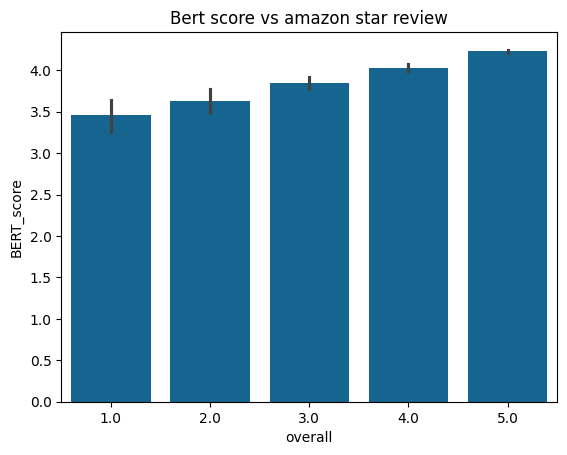

<Figure size 1000x600 with 0 Axes>

In [26]:
sns.barplot(data=BERT_SCORE,x = 'overall',y='BERT_score')
plt.title('Bert score vs amazon star review')
plt.figure(figsize=(10, 6))

4. HUGGING FACE - ROBERTA SENTIMENT ANALYSIS APPROACH

In [27]:
# roberta model intialization
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment-latest')
roberta_model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment-latest')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
# example
ip = tokenizer.encode('i am sad',return_tensors='pt')
o_p = roberta_model(ip)
o_p

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.1746,  0.1882, -1.5985]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [29]:
from torch import softmax
# applying roberta model on dataset

def roberta(review):
   inputs = tokenizer.encode(review, return_tensors='pt')
  
   outputs = roberta_model(inputs)
  
   return int(torch.argmax(outputs.logits)) 
    
   
    

In [30]:
out = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = str(row['reviewText'])
        ID = row['reviewerID']
        out[ID] = roberta(text)
    except RuntimeError:
        print(f'broke for {ID}')
    except IndexError:
        print(f'broke for {ID}')
    

  0%|          | 0/10261 [00:00<?, ?it/s]

broke for A2MR43RDPZX3J
broke for A2KI91IR3RA7D0
broke for A2KI91IR3RA7D0
broke for A203OCQQ12MAVT
broke for A20L3BCRCICRSQ
broke for A15TYOEWBQYF0X
broke for A2MMH4O7EDNLCV
broke for A2RIQKV4OOXME1
broke for A3MRBUCGH66JTY
broke for A2ZGEV4CTSCTIZ
broke for A23AKO4BZLZ8DE
broke for A22Z554ZQ8NFPC
broke for A27L5L6I7OSV5B
broke for ADH0O8UVJOT10
broke for A1EX4410F46C8O
broke for A3FW4THIMBIN6V
broke for A3BMI7VGJT60Y7
broke for A8ANJNZAZQ6IQ
broke for A356RFKNIG043B
broke for ALHC64J88LVWO
broke for A356RFKNIG043B
broke for A3JUQ2E799OC5B
broke for A3EXWV8FNSSFL6
broke for A3AOPVQ7EZHTWA
broke for A2XXBZPQT5EXHV
broke for A2KI91IR3RA7D0
broke for A1QDSJZQWJZOL1
broke for A3GH47E9FF8WN1
broke for A1XNCV67JBJVF7
broke for A1SCWHXAB2ZK7N
broke for A3GH47E9FF8WN1
broke for A2VH0UT5EQFB6P
broke for A6FIAB28IS79
broke for A3EXWV8FNSSFL6
broke for A1URXSRV6WDHVY
broke for A2WA8TDCTGUADI
broke for A2101DHHDMZ93X
broke for A3FQ9WYUHG9CD
broke for A2C46HQIZLYJUC
broke for A15TYOEWBQYF0X
broke f

In [31]:
out

{'A2IBPI20UZIR0U': 2,
 'A14VAT5EAX3D9S': 2,
 'A195EZSQDW3E21': 0,
 'A2C00NNG1ZQQG2': 2,
 'A94QU4C90B1AX': 2,
 'A2A039TZMZHH9Y': 2,
 'A1UPZM995ZAH90': 0,
 'AJNFQI3YR6XJ5': 1,
 'A3M1PLEYNDEYO8': 2,
 'AMNTZU1YQN1TH': 2,
 'A2NYK9KWFMJV4Y': 2,
 'A35QFQI0M46LWO': 2,
 'A2NIT6BKW11XJQ': 2,
 'A1C0O09LOLVI39': 2,
 'A17SLR18TUMULM': 2,
 'A2PD27UKAD3Q00': 2,
 'AKSFZ4G1AXYFC': 2,
 'A67OJZLHBBUQ9': 2,
 'A2EZWZ8MBEDOLN': 2,
 'A1CL807EOUPVP1': 2,
 'A1GMWTGXW682GB': 2,
 'A2G12DY50U700V': 2,
 'A3E0CF25A7LD2': 1,
 'A2W3CLAYZLDPTV': 1,
 'A398X9POBHK69N': 2,
 'AXWB93VKVML6K': 2,
 'A2FZ4Z0UFA1OR8': 0,
 'AXP9CF1UTFRSU': 1,
 'A2CCGGDGZ694CT': 2,
 'A27DR1VO079F1V': 1,
 'A1LQC225SE8UNI': 2,
 'AU9BPT3Y3K6J4': 2,
 'A14Z9LAETO21KL': 1,
 'A2074KEJGRYJV4': 2,
 'A7TRK2GG6BHWD': 2,
 'A319B090A2POEB': 0,
 'A396ELNTQDFYPO': 0,
 'A17CU1D2CWXOHB': 2,
 'A1S0HTDO0P4N5V': 0,
 'A3DWQW2L39RB1S': 0,
 'AQQ91U1U4YKDF': 2,
 'AA5TINW2RJ195': 2,
 'ABC68JUCPTVOE': 2,
 'A3W2E6S24BTXXK': 2,
 'A3872Y2XH0YDX1': 2,
 'A13A81NN0NRD1S': 2,
 

In [32]:
ROBERTA_SCORE = pd.DataFrame(list(out.items()), columns=['reviewerID', 'ROBERTA_score  0 - negative 1 - neutral 2 -positive'])

ROBERTA_SCORE

,reviewerID,ROBERTA_score 0 - negative 1 - neutral 2 -positive
0,A2IBPI20UZIR0U,2
1,A14VAT5EAX3D9S,2
2,A195EZSQDW3E21,0
3,A2C00NNG1ZQQG2,2
4,A94QU4C90B1AX,2
...,...,...
1422,A27EWIL4YBWTA0,2
1423,A3EYCAYIIBDXUF,1
1424,A3HH71P93ZWAMB,2
1425,A3A7Y3TSPPZU9T,2


In [33]:
# merging with data frame
ROBERTA_SCORE = ROBERTA_SCORE.merge(df2, how = 'left')
ROBERTA_SCORE.sample(20)

,reviewerID,ROBERTA_score 0 - negative 1 - neutral 2 -positive,asin,reviewerName,reviewText,overall,summary
8015,A2ZGBCQPF5Q17N,2,B0002F7K7Y,"Earle G ""Earle G""",I have been using this brand in several differ...,5.0,D'Addario EXL110 Nickel Wound Electric Guitar ...
8499,A2PP4G3DLGDD4T,2,B00BU9KCXK,Popper,Simple to deploy and holds the guitar very eff...,5.0,Simple & Easy to Store
9543,AIRZAEK6LLYQ,2,B003VWKPHC,Slowleadmccey,I got this after seeing many of my church frie...,5.0,good tuner
3426,ALB04NLERUCYC,2,B0002CZVXM,GaryG,"Oh Yeah, Love this item, sleek looking and ver...",5.0,Great Buy
4753,A2SKZZZBV1XYWP,2,B0002GLDQM,Sledman,I lose picks constantly. Years ago I resorted ...,5.0,Just want I've been needing!
1965,A26SN2CVQM4FKM,2,B000EEHJS8,bayou bob,this is great stuff....only problem...no order...,4.0,love it..
9928,A24Z0TLWP8FXGV,2,B000RNB720,Kevin McGonigal,This is a very nice way to get rid of all thos...,5.0,Just what I needed
7731,A3HMFQWM9Q21SD,0,B001GWCC4I,Paul D Ford,Bought two of these inexpensive adapters and a...,5.0,Works very well
1906,A3H4FCMNBYS09K,2,B0002DV6RQ,the goat,"put them on my daughter's guitar, and she enjo...",4.0,okay
1255,AJ3MI4QT7339J,0,B002HJ61PK,"Greg Runyon ""Loves Amazon""","not so pleased with this, the seller is fine, ...",2.0,nawwwwwww


<Figure size 1000x600 with 0 Axes>

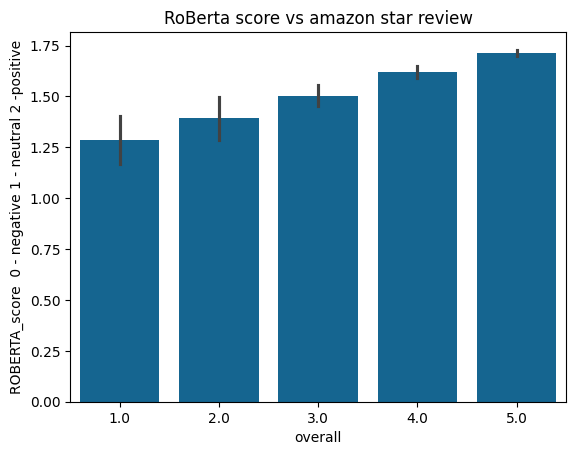

<Figure size 1000x600 with 0 Axes>

In [34]:
sns.barplot(data=ROBERTA_SCORE,x = 'overall',y='ROBERTA_score  0 - negative 1 - neutral 2 -positive')
plt.title('RoBerta score vs amazon star review')
plt.figure(figsize=(10, 6))

5. COMPARING ALL THE MODEL'S SCORE WITH THE OVERALL(ACTUAL) SCORE

In [35]:
# creating final data frame

final = vader_result.merge(BERT_SCORE, how = 'left')
final = final.merge(ROBERTA_SCORE , how='left')
final = final.drop(['asin','reviewerName','summary'],axis=1)
reorder = ['reviewerID', 'reviewText','overall', 'neg','neu','pos','compound','BERT_score','ROBERTA_score  0 - negative 1 - neutral 2 -positive']
final_reordered = final[reorder]

final_reordered =final_reordered.rename(columns={'neg':'vader_neg','neu':'vader_neu','pos':'vader_pos','compound':'vader_compound'})
final_reordered.sample(20)

,reviewerID,reviewText,overall,vader_neg,vader_neu,vader_pos,vader_compound,BERT_score,ROBERTA_score 0 - negative 1 - neutral 2 -positive
4523,A12O5B8XNKNBOL,"Very nice!! Super vivid, easy to see color. ...",5.0,0.021,0.887,0.092,0.5793,4.0,2.0
5955,A3DZBMO93FHKTH,I ordered the polyweb strings on the advice of...,5.0,0.000,0.916,0.084,0.7891,4.0,1.0
7882,A2M93TVNC93C3P,Works great as a stand for the Elec.Guitar. Wo...,5.0,0.000,0.823,0.177,0.5129,4.0,2.0
1567,A2N4QZ92NBKJZZ,4 stars instead of 5 only because this thing w...,4.0,0.000,0.806,0.194,0.9371,5.0,2.0
980,AFLRU6952DEFX,JCM800 in a 30 dollar box? Not quite. You can...,4.0,0.019,0.874,0.107,0.7662,4.0,0.0
1737,AJK15Q9JOEHRH,Got a packet to try but I found they are bette...,5.0,0.000,0.877,0.123,0.5175,5.0,2.0
8428,AO7WPPUO75BBK,Nice cables for the price. Nice to have a good...,5.0,0.084,0.594,0.323,0.8710,4.0,2.0
6585,ALVO1A5UB8DG0,"Fender Medium, my favorite guitar pick, a doze...",5.0,0.015,0.731,0.254,0.9809,4.0,2.0
394,A14Z9LAETO21KL,"I used to have bulk 18 gauge wire, and Switchc...",4.0,0.047,0.953,0.000,-0.5048,4.0,1.0
1035,A1MVH1WLYDHZ49,"You should find another review from me, but su...",5.0,0.000,0.691,0.309,0.8802,5.0,2.0


Text(0.5, 1.0, 'ROBERTA_score  vs Amazon Star Review')

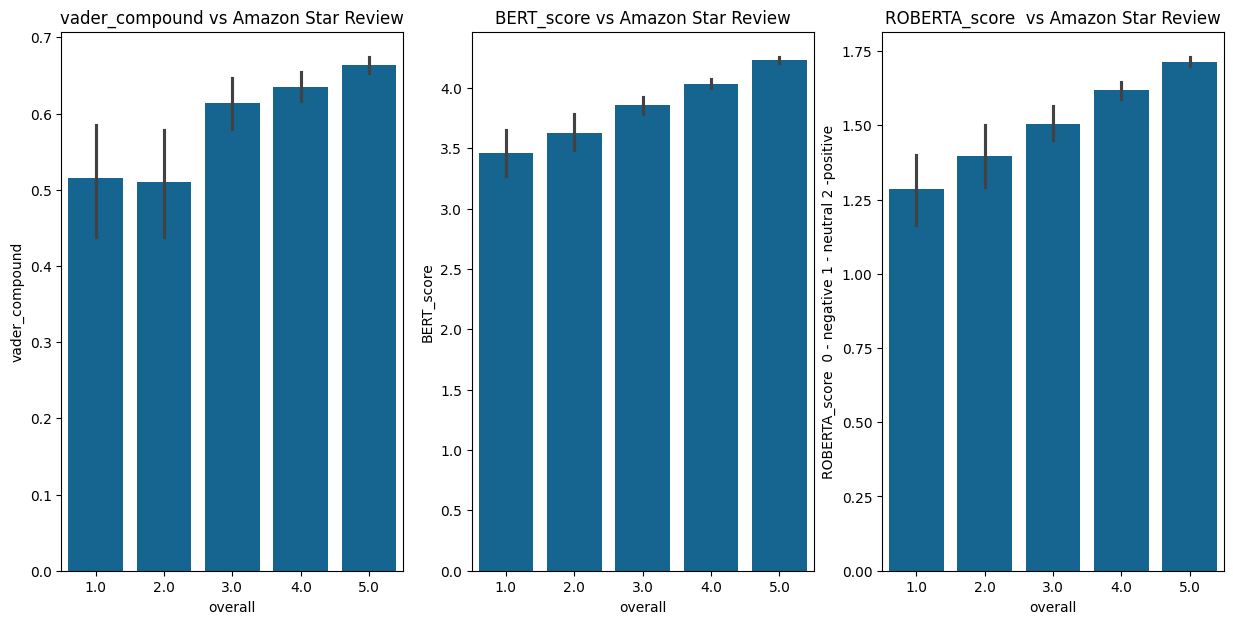

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))


sns.barplot(data=final_reordered, x='overall', y='vader_compound', ax=axs[0])
sns.barplot(data=final_reordered, x='overall', y='BERT_score', ax=axs[1])
sns.barplot(data=final_reordered, x='overall', y='ROBERTA_score  0 - negative 1 - neutral 2 -positive', ax=axs[2])

axs[0].set_title('vader_compound vs Amazon Star Review')
axs[1].set_title('BERT_score vs Amazon Star Review')
axs[2].set_title('ROBERTA_score  vs Amazon Star Review')

6. RESULT

Based on analysis of the musical instruments reviews dataset, the RoBERTa model demonstrated superior performance in predicting sentiments when compared to BERT and VADER.VADER showed the least favorable results in this particular comparison.